#The Sparks Foundation
#Data Science & Business Analytics Internship
#Task - 4: Predict the percentage of an student based on the no. of study hours.
#By - Sritama Dutta

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  

**Importing the dataset**

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)     
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Visualising the data

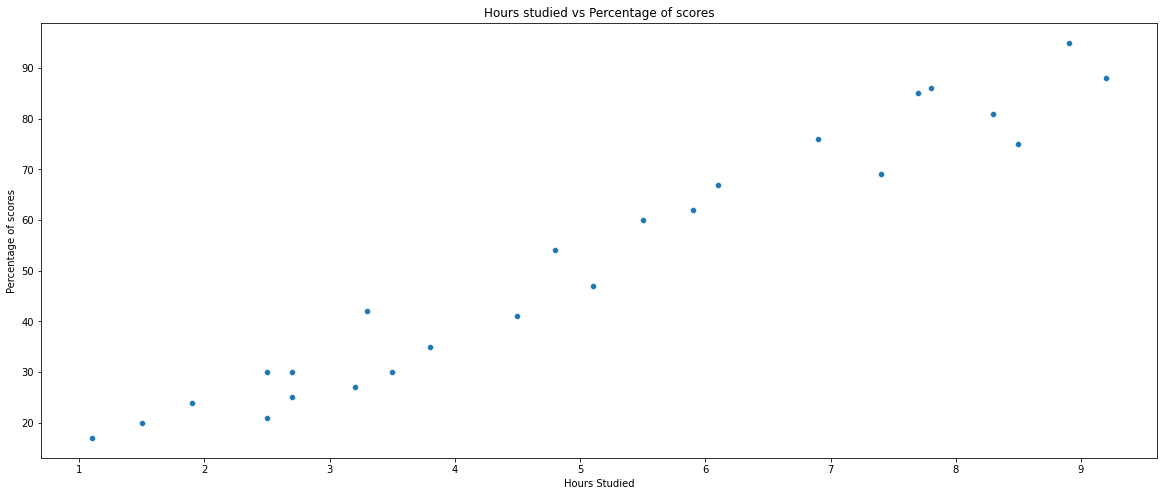

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = "Hours", y = "Scores", data = data)
plt.title("Hours studied vs Percentage of scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of scores")
plt.show()

**This plot shows that there is a linear relationship between the study hours and the percentage of scores of a student. So, We can use simple linear regression to predict the score of a student if we know the study hours of that student.**

#Splitting the dataset

In [ ]:
hours = data.iloc[:, :-1].values  
scores = data.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(hours, scores,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

#Fitting Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Plotting the regression line

Text(0.5, 1.0, 'Fitted Regression Line')

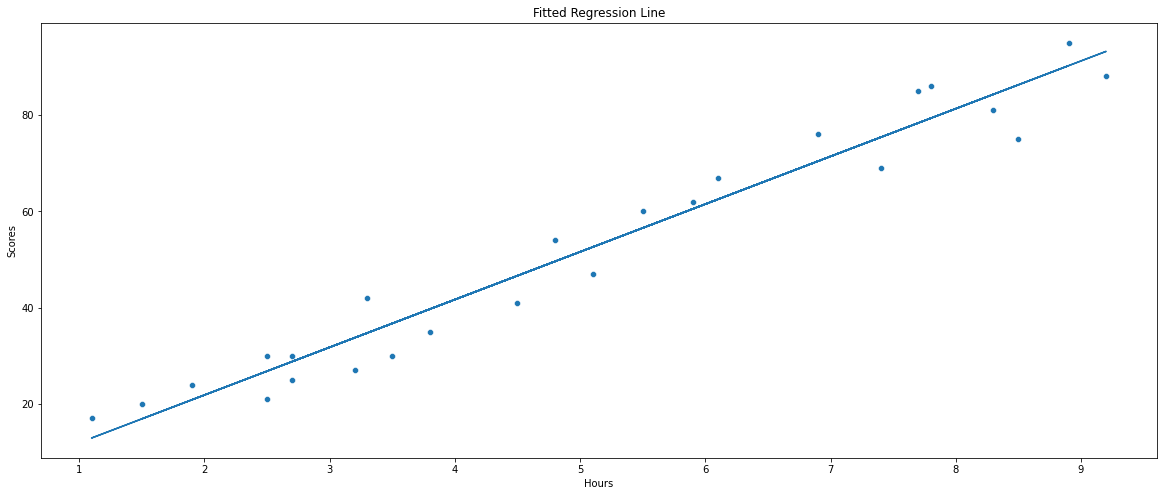

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "Hours", y = "Scores", data = data)
m = regressor.coef_
b = regressor.intercept_
plt.plot(hours, m*hours+b)
plt.title("Fitted Regression Line")

#Prediction

**Now we have to preict the score of a student who studied 9.25hrs/day**

In [ ]:
hour_given = np.array(9.25)
hour_given = hour_given.reshape(1,-1)
pred_score = regressor.predict(hour_given)

In [ ]:
print("The predicted score of the student is " + str(float(pred_score)))

The predicted score of the student is 93.69173248737539


#Thank You